Seminar 1 - Pattern Recognition
=================

##  Exercise 1

Find an example in order to explain all of these concepts:

### Feature

Let's imagine we want to construct a handwriting digit recognizer. Somehow using advanced pattern recognition techniques we are able to indentify the number of straight horizontal lines in each sample containing a number. These straight horizontal lines are **features**.

### Supervised Learning

An example of supervised learning is a prediction model. Imagine a dataset where you want to predict if a house is going be sold based on its price and the average income of a household of the zone where the house is, such as:

| House Price | Average Income | Sold? |
|--------------------------------------|
| 120000      | 24000          |  Yes  |
| 135000      | 30000          |  Yes  |
| 180000      | 24000          |  No   |

Well, you could feed a learning algorithm to learn about the $n$ features that contribute to a house being sold and try to predict if it's going get sold.

### Classification

Try to predict if a picture contains a cat or a tiger.

### Regression

Try to predict stock prices or estimate the remaining battery left in a phone based on several features.

### Unsupervised Learning

Try to classify $n$ amount of people into $m$ groups. For example, you have a dataset of height and weight of your clients and you want to create the best fit for S, M, and L kind of clothes for them. Clustering would be a good approach.

### Clustering

Clustering is an unsupervised learning technique used to automatically classify unlabeled data into groups, also known as clusters. After that, this new data can be used to improve the algorithm.

## 2. (Bayes Theorem) Walking through the jungle, you see a large feline shadow. However, you can not identify what animal it is. You know that, in this area of the jungle, 90% of felines are not dangerous cats whereas the other 10 % are pumas . In addition, you know that 80% of cats are smaller than the animal you are seeing whereas 85% of pumas has a similar size. Would you run?

*Reminder*: We define Bayes Theorem as follows $p(A|B) = \frac{p(B|A)p(A)}{p(B)}$, where $A, B$ are events and $p(B) \neq 0$

### **Procedure**:

Let $A$ denote the event of feline being dangerous. Let $B$ denote the event of watching a big feline with similar size to pumas and bigger than 80% of cats. We know that the probability of any random given feline of being a puma is 0.1 and any random feline of being a cat is 0.9. Also, we know that 85% of pumas can be a big feline like the one watched and that at most, 20% of cats are like that big feline:

$p(A) = 0.1$

$p(B) = 0.1 \cdot 0.85 + 0.9 \cdot 0.2 = 0.265$

Then, the probability of  watching a big feline ($B$) **knowing** that the feline is a puma ($A$) is defined as:

$p(B|A) = 0.85$

Then, using Bayes Theorem we can calculate the probability of a feline being a puma given the event that we see a big feline: $p(A|B)$

$p(A|B) = \frac{p(B|A)p(A)}{p(B)} = \frac{0.85 \cdot 0.1}{0.265} = 0.32$

***Indeed, I would run.***

# Gaussian Model
## 3. Following the last example, assume that the variable size is continuous:
### Draw a figure (approximated) of the distribution functions p(size | cat) and p(size | puma). To do so, assume that the size of cats and pumas follow a normal distribution where cat’s size tend to be smaller than pumas. Moreover, you know that the size of different cat species use to be more variable than in the case of pumas.

### Over the same figure, and following the Bayesian Decision Theory, draw the 2 decision regions which classify cats and pumas with respect to their size. Draw also the region which corresponds to the decision error.

## Matlab Demo

The decision error is around = 57.4788



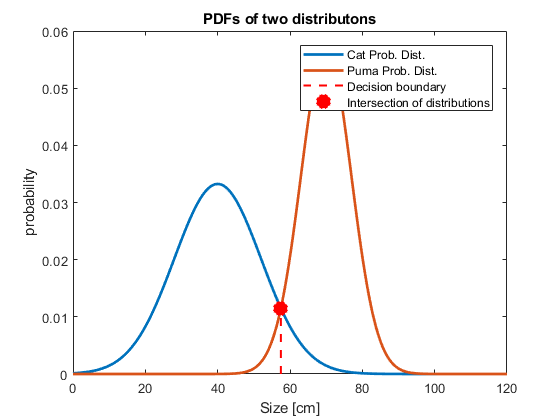

In [84]:
size_var = linspace(0,120, 200);
mu_cat = 40;
mu_puma = 70;
sigma_cat = 12;
sigma_puma = 7;
p_cat = normpdf(size_var, mu_cat, sigma_cat);
p_puma = normpdf(size_var, mu_puma, sigma_puma);
plot(size_var, p_cat, 'lineWidth', 2);
hold on;
plot(size_var, p_puma, 'lineWidth', 2);
title('PDFs of two distributons');
ylabel('probability');
xlabel('Size [cm]');

p_cat_func = @(x) exp(-(x-mu_cat).^2 / (2*sigma_cat^2)) / sqrt(2*sigma_cat^2*pi);
p_puma_func = @(x) exp(-(x-mu_puma).^2 / (2*sigma_puma^2)) / sqrt(2*sigma_puma^2*pi);
intersection = fzero(@(x) p_cat_func(x) - p_puma_func(x), (mu_cat + mu_puma)/2);
disp(['The decision error is around = ', num2str(intersection)]);
line([intersection, intersection], [0, p_cat_func(intersection)], 'Color','red','LineStyle','--', 'lineWidth', 1.5);
plot(intersection, p_cat_func(intersection), 'r*', 'lineWidth', 10);
legend('Cat Prob. Dist.', 'Puma Prob. Dist.', 'Decision boundary', 'Intersection of distributions');

## Assume that probabilities p(size|cat) and p(size|puma) follow two normal distributions $N(μ_1 , σ )$ and $N(μ_2 , σ )$ respectively. Given that p(cat) = p(puma) = 0.5 and σ1 = σ2 , find the size value x\* which corresponds to the decision boundary classifying cats or pumas. Define x\* as a function of $μ_1$ and $μ_2$ . 

## Matlab Demo

Assuming the variance is the same for both distributions...
The decision error is around = 55



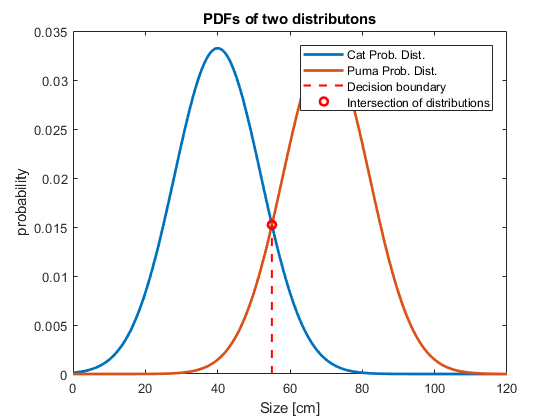

In [85]:
disp('Assuming the variance is the same for both distributions...')
size_var = linspace(0,120, 200);
mu_cat = 40;
mu_puma = 70;
sigma_cat = 12;
sigma_puma = 12;
p_cat = normpdf(size_var, mu_cat, sigma_cat);
p_puma = normpdf(size_var, mu_puma, sigma_puma);
plot(size_var, p_cat, 'lineWidth', 2);
hold on;
plot(size_var, p_puma, 'lineWidth', 2);
title('PDFs of two distributons');
ylabel('probability');
xlabel('Size [cm]');

p_cat_func = @(x) exp(-(x-mu_cat).^2 / (2*sigma_cat^2)) / sqrt(2*sigma_cat^2*pi);
p_puma_func = @(x) exp(-(x-mu_puma).^2 / (2*sigma_puma^2)) / sqrt(2*sigma_puma^2*pi);
intersection = fzero(@(x) p_cat_func(x) - p_puma_func(x), (mu_cat + mu_puma)/2);
disp(['The decision error is 0.5 at size = ', num2str(intersection)]);
line([intersection, intersection], [0, p_cat_func(intersection)], 'Color','red','LineStyle','--', 'lineWidth', 1.5);
plot(intersection, p_cat_func(intersection), 'ro', 'lineWidth', 2);
legend('Cat Prob. Dist.', 'Puma Prob. Dist.', 'Decision boundary', 'Intersection of distributions');

## 5. Imagine that you have a hen and a goose in your home. One day, you find an egg but you do not know who have laid it. You measure the weight and the height of the egg, which are 60g and 5cm respectively. Assuming that the laying frequency of the chickens is the double than the gooses one, and the following mean and covariance matrices:

## Dataset:

$\mu_1 = (54, 5)$

$\mu_2 = (65, 6)$

$\sigma_1 =
\left(\begin{array}{cc} 
5 & \frac{1}{10}\\
\frac{1}{10} & \frac{1}{2}
\end{array}\right)$

$\sigma_2 =
\left(\begin{array}{cc} 
8 & \frac{1}{5}\\
\frac{1}{5} & 1
\end{array}\right)$

What we have to do is calculate the probability density function (pdf) of the two distributions. One pdf for the chicken eggs and another one for the goose eggs. However, this time we have two variables, weight and size, so we have to use the multivariate gaussian pdf, given by the formula: 

$$\operatorname{det}(2\pi\boldsymbol\Sigma)^{-\frac{1}{2}} \, e^{ -\frac{1}{2}(\mathbf{x} - \boldsymbol\mu)'\boldsymbol\Sigma^{-1}(\mathbf{x} - \boldsymbol\mu) }$$

So we just have to compute the pdf of the sample in both pdf, compare the probabilities and predict the one with a higher pdf. The probability of predicting correctly given distribution A, as it was explained on the last exercise, is done by taking the pdf of distribution A and dividing it by the sum of the pdfs of all the distributions. Using Matlab we can easily visualize the results:

## Matlab demo

Probability of being a goose is 0.68397



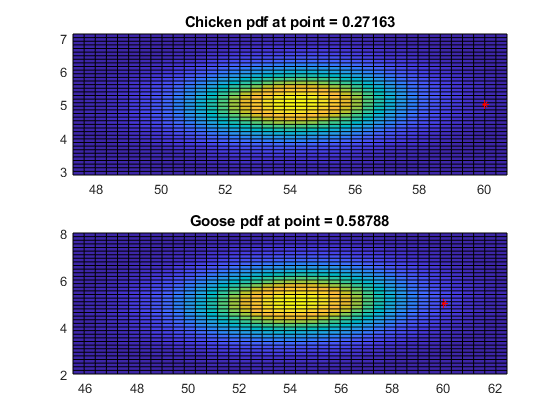

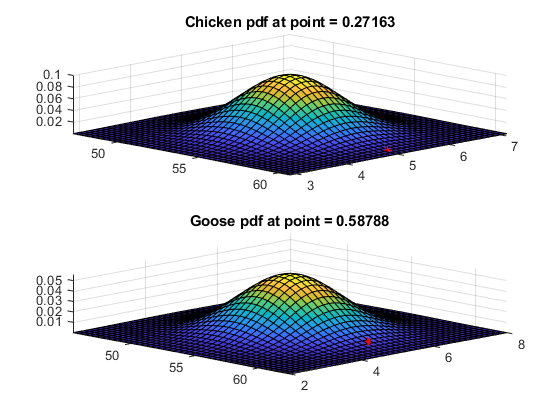

In [86]:
scale = 3;
s = scale;
res = 40;

figure(1)

% Chicken?
meanWeight_chicken = 54;
meanHeight_chicken = 5;
mu = [meanWeight_chicken, meanHeight_chicken]; 
SIGMA = [5 .1; .1 .5]; 
[X1,X2] = meshgrid(linspace(meanWeight_chicken - s*sqrt(SIGMA(1, 1)), meanWeight_chicken+s*sqrt(SIGMA(1, 1)),res)',linspace(meanHeight_chicken-s*sqrt(SIGMA(2, 2)),meanHeight_chicken+s*sqrt(SIGMA(2, 2)),res)');
X = [X1(:) X2(:)];
p = mvnpdf(X,mu,SIGMA);
subplot(2, 1, 1);
surf(X1,X2,reshape(p,res,res));
hold on;
X = [60, 5];
p_chicken = mvnpdf(X,mu,SIGMA);
plot3(X(1), X(2), p_chicken, 'r*');
title(['Chicken pdf at point = ' num2str(mvnpdf(X,mu,SIGMA)*100)])
axis tight
view(45, 45)

% Goose?
meanWeight_goose = 65;
meanHeight_goose = 6;
mu = [meanWeight_chicken, meanHeight_chicken]; 
SIGMA = [8 .2; .2 1]; 
[X1,X2] = meshgrid(linspace(meanWeight_chicken - s*sqrt(SIGMA(1, 1)), meanWeight_chicken+s*sqrt(SIGMA(1, 1)),res)',linspace(meanHeight_chicken-s*sqrt(SIGMA(2, 2)),meanHeight_chicken+s*sqrt(SIGMA(2, 2)),res)');
X = [X1(:) X2(:)];
p = mvnpdf(X,mu,SIGMA);
subplot(2, 1, 2);
surf(X1,X2,reshape(p,res,res));
hold on;
X = [60, 5];
p_goose = mvnpdf(X,mu,SIGMA);
plot3(X(1), X(2), p_goose, 'r*', 'lineWidth', 2);
title(['Goose pdf at point = ' num2str(mvnpdf(X,mu,SIGMA)*100)])
axis tight
view(45, 45)
disp(['Probability of being a goose is ' num2str(p_goose/(p_goose+p_chicken))]);

% Top Views

figure(2)


% Chicken?
meanWeight_chicken = 54;
meanHeight_chicken = 5;
mu = [meanWeight_chicken, meanHeight_chicken]; 
SIGMA = [5 .1; .1 .5]; 
[X1,X2] = meshgrid(linspace(meanWeight_chicken - s*sqrt(SIGMA(1, 1)), meanWeight_chicken+s*sqrt(SIGMA(1, 1)),res)',linspace(meanHeight_chicken-s*sqrt(SIGMA(2, 2)),meanHeight_chicken+s*sqrt(SIGMA(2, 2)),res)');
X = [X1(:) X2(:)];
p = mvnpdf(X,mu,SIGMA);
subplot(2, 1, 1);
surf(X1,X2,reshape(p,res,res));
hold on;
X = [60, 5];
p_chicken = mvnpdf(X,mu,SIGMA);
plot3(X(1), X(2), p_chicken, 'r*');
title(['Chicken pdf at point = ' num2str(mvnpdf(X,mu,SIGMA)*100)])
view(0, 90)
axis tight

% Goose?
meanWeight_goose = 65;
meanHeight_goose = 6;
mu = [meanWeight_chicken, meanHeight_chicken]; 
SIGMA = [8 .2; .2 1]; 
[X1,X2] = meshgrid(linspace(meanWeight_chicken - s*sqrt(SIGMA(1, 1)), meanWeight_chicken+s*sqrt(SIGMA(1, 1)),res)',linspace(meanHeight_chicken-s*sqrt(SIGMA(2, 2)),meanHeight_chicken+s*sqrt(SIGMA(2, 2)),res)');
X = [X1(:) X2(:)];
p = mvnpdf(X,mu,SIGMA);
subplot(2, 1, 2);
surf(X1,X2,reshape(p,res,res));
hold on;
X = [60, 5];
p_goose = mvnpdf(X,mu,SIGMA);
plot3(X(1), X(2), p_goose, 'r*');
title(['Goose pdf at point = ' num2str(mvnpdf(X,mu,SIGMA)*100)])
view(0, 90)
axis tight

## 6. Download the data from the dataset that you will find in https://archive.ics.uci.edu/ml/datasets/Iris and build a Multivariate Gaussian Mixture Model. Use it to classify the following unlabeled samples:


| Sepal length | Petal length | Sepal width | Petal width |
|--------------|--------------|-------------|-------------|
| 4,9          | 3,2          | 1,7         | 0,2         |
| 5            | 3,2          | 1,6         | 0,5         |
| 5,5          | 2,8          | 3,6         | 1,3         |
| 7,1          | 3,1          | 6,1         | 1,7         |



**Gaussian Distribution Formula:**

$$
\mathcal{N}(\boldsymbol\mu,\,\boldsymbol\Sigma) \sim \operatorname{det}(2\pi\boldsymbol\Sigma)^{-\frac{1}{2}} \, e^{ -\frac{1}{2}(\mathbf{x} - \boldsymbol\mu)'\boldsymbol\Sigma^{-1}(\mathbf{x} - \boldsymbol\mu) }
$$

In [87]:
clearvars;
format short;
disp('Reading samples...');
samples = [4.9, 3.2, 1.7, 0.2; 5, 3.2, 1.6, 0.5; 5.5, 2.8, 3.6, 1.3; 7.1, 3.1, 6.1, 1.7]; % Imaginary Samples

% Labels
% 1: Setosa
% 2: Versicolor
% 3: Virginica

addpath('dataset');
dataset = csvread('data.csv');
labels = ["setosa", "versicolor", "virginica"];
% Clean the dataset

sepal_length = dataset(:, 1);
petal_length = dataset(:, 2);
sepal_width  = dataset(:, 3);
petal_width  = dataset(:, 4);
classId      = dataset(:, 5);
X            = [sepal_length, petal_length, sepal_width, petal_width]; % Features
y            = classId;                                                % Variable we want to predict

% Extract features from each class

X_setosa =     X(find(y(:) == 1), :);
X_versicolor = X(find(y(:) == 2), :);
X_virginica =  X(find(y(:) == 3), :);

% Calculate cov. matrices

setosa_covMat = cov(X_setosa);
versicolor_covMat = cov(X_versicolor);
virginica_covMat = cov(X_virginica);

% Extract the means

setosa_mean = mean(X_setosa, 1);
versicolor_mean = mean(X_versicolor, 1);
virginica_mean = mean(X_virginica, 1);

% Calculate the pdf of the samples

setosa_pdf = mvnpdf(samples, setosa_mean, setosa_covMat);
versicolor_pdf =  mvnpdf(samples, versicolor_mean, versicolor_covMat);
virginica_pdf =  mvnpdf(samples, virginica_mean, virginica_covMat);

% Probability of the samples being setosa
prob_setosa = (setosa_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

% Probability of the samples being setosa
prob_versicolor = (versicolor_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

% Probability of the samples being setosa
prob_virginica = (virginica_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

matProbabilities = [prob_setosa, prob_versicolor, prob_virginica];

for i=1:size(matProbabilities, 1)
    [value, idx] = max(matProbabilities(i, :));
    disp(['The sample ', num2str(i), ' is a ', char(labels(idx)), '. Confidence: ', num2str(value*100), ' %']);
end

Reading samples...
The sample 1 is a setosa. Confidence: 100 %
The sample 2 is a setosa. Confidence: 100 %
The sample 3 is a versicolor. Confidence: 99.9972 %
The sample 4 is a virginica. Confidence: 99.9289 %



## 7. Suppose that we have a set of 2D samples: [0, 0], [1, 1], [2, 3], [3, 2] and [4, 4].
### (a) Draw the data and compute the covariance matrix.
### (b) Apply PCA over these samples and find the basis where the data have the maximum variance. To do so, find the eigenvalues and eigenvectors of the data covariance matrix. Draw these basis in the same figure than the previous exercise.

### (c) Project the data over the obtained basis with PCA. Discuss the relation existing between the covariance of the projected data and the eigenvalues computed in b).
### (d) Project and re-project the data using only the basis of maximum variance. Draw the results over the original data.

Covariance Formula:

$C_v = \frac{1}{N-1}\left(X-\mu\right)\left(X-\mu\right)^{T}$

1. Draw the data
2. Compute the covariance matrix

covarMat =

    2.5000    2.2500
    2.2500    2.5000

3. Apply PCA and find the basis:

eigenVector =

   -0.7071    0.7071
    0.7071    0.7071


eigenValue =

    0.2500         0
         0    4.7500

We take the vector with the highest eigenValue.
Highest Eigenvalue: 4.75
Max. var. Eigenvector / new basis: [0.70711     0.70711]

dimReduction =

         0    1.4142    3.5355    3.5355    5.6569


projected_X =

         0    1.0000    2.5000    2.5000    4.0000
         0    1.0000    2.5000    2.5000    4.0000




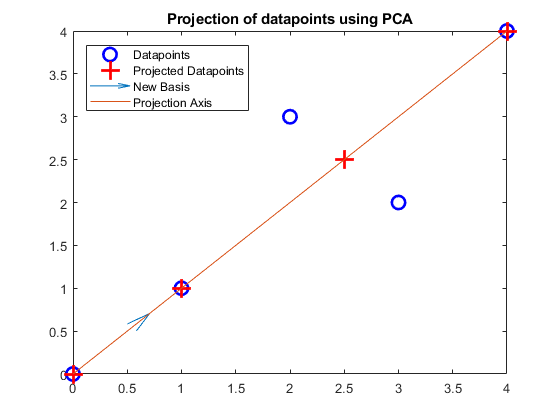

In [88]:
clearvars;
dataset = [0,0; 1,1; 2,3;3,2; 4,4]';
disp('1. Draw the data');
plot(dataset(1, :), dataset(2, :),'bo','MarkerSize', 10, 'lineWidth', 2);

disp('2. Compute the covariance matrix');
mu = mean(dataset, 2);
covarMat = ((dataset - mu) * (dataset - mu)')./(size(dataset, 2)-1)

% apply PCA and find the basis where the data has the maximum variance

% Find the eigenvalues and vectors to do so
disp('3. Apply PCA and find the basis:');
[eigenVector, eigenValue] = eig(covarMat)

disp('We take the vector with the highest eigenValue.');
[value, idx] = max(eigenValue);
[value, idx] = max(value);

disp(['Highest Eigenvalue: ', num2str(value)]);
eigenVector_reduced = eigenVector(:, idx);
disp(['Max. var. Eigenvector / new basis: [' num2str(eigenVector_reduced'), ']']);

dimReduction = eigenVector_reduced' * dataset

projected_X = eigenVector_reduced * dimReduction
hold on;
plot(projected_X(1, :), projected_X(2, :), 'r+', 'MarkerSize', 14, 'lineWidth', 2);
hor_axis_helper = min(dataset(1, :)):0.1:max(dataset(2, :));
quiver(0, 0, eigenVector_reduced(1), eigenVector_reduced(2), 1, 'maxHeadSize', 1)
plot(hor_axis_helper, hor_axis_helper*eigenVector_reduced(2)/eigenVector_reduced(1));

title('Projection of datapoints using PCA');
legend('Datapoints', 'Projected Datapoints', 'New Basis', 'Projection Axis', 'location', 'northwest');

## 8. Repeat the previous exercise with the Cartesian samples [0, 1], [0, -1], [1, 0], [-1, 0] but using cylindrical coordinates (you first have to transform the data to cylindrical coordinates)

### Matlab Demo


dataset =

     0     0     1    -1
     1    -1     0     0

We go from cartesian to polar...

dataset =

    1.5708   -1.5708         0    3.1416
    1.0000    1.0000    1.0000    1.0000


covariance_mat =

    4.1123         0
         0         0


eigenVector =

     0     1
     1     0


eigenValue =

         0         0
         0    4.1123

We take the vector (in our new polar space) with the highest eigenValue.
Highest Eigenvalue: 4.1123
Max. var. Eigenvector / new basis: [1  0]

z =

    1.5708   -1.5708         0    3.1416


projected_data =

    1.5708   -1.5708         0    3.1416
         0         0         0         0




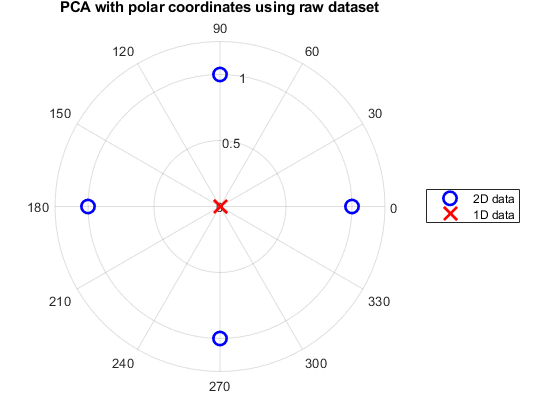

In [1]:
clearvars;
% Load the data
dataset = [0, 0, 1, -1; 1, -1, 0, 0]

% Convert to polar coordinates
disp('We go from cartesian to polar...');
[theta radius] = cart2pol(dataset(1, :), dataset(2, :));
dataset = [theta; radius]

% Plotting
figure(1);
polarplot(dataset(1, :), dataset(2, :),'bo','MarkerSize', 10, 'lineWidth', 2);
hold on;
rlim([0, 1.25]);
title('PCA with polar coordinates using raw dataset')

% Calculate covariance matrix
covariance_mat = cov(dataset')

% Calculate eigenvectors
[eigenVector eigenValue] = eig(covariance_mat)

% Take the most important eigenvectors
disp('We take the vector (in our new polar space) with the highest eigenValue.');
[value, idx] = max(eigenValue);
[value, idx] = max(value);
disp(['Highest Eigenvalue: ', num2str(value)]);
eigenVector_reduced = eigenVector(:, idx);
disp(['Max. var. Eigenvector / new basis: [' num2str(eigenVector_reduced'), ']']);

% Calculate the new values in the new basis
z = eigenVector_reduced' * dataset

% Reproject the data
projected_data = eigenVector_reduced * z
polarplot(projected_data(1, :), projected_data(2, :),'rx','MarkerSize', 14, 'lineWidth', 2);
legend('2D data', '1D data');


dataset =

     0     0     1    -1
     1    -1     0     0

We go from cartesian to polar...SUBSTRACTING MEAN!

dataset =

    0.7854   -2.3562   -0.7854    2.3562
         0         0         0         0


covariance_mat =

    4.1123         0
         0         0


eigenVector =

     0     1
     1     0


eigenValue =

         0         0
         0    4.1123

We take the vector (in our new polar space) with the highest eigenValue.
Highest Eigenvalue: 4.1123
Max. var. Eigenvector / new basis: [1  0]

z =

    0.7854   -2.3562   -0.7854    2.3562

# We add the mean to the projected data!

projected_data =

    1.5708   -1.5708         0    3.1416
    1.0000    1.0000    1.0000    1.0000




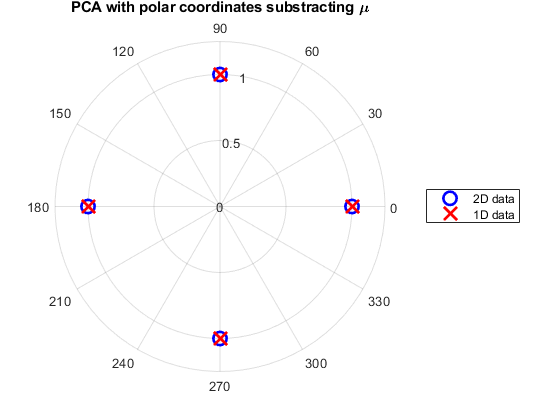

In [90]:
clearvars;
dataset = [0, 0, 1, -1; 1, -1, 0, 0]
disp('We go from cartesian to polar...SUBSTRACTING MEAN!');
[theta radius] = cart2pol(dataset(1, :), dataset(2, :));
dataset = [theta; radius];
mu = mean(dataset, 2);
dataset = dataset - mu

% Calculate cov. mat.
covariance_mat = cov(dataset')

% Calculate Eigens

[eigenVector eigenValue] = eig(covariance_mat)

disp('We take the vector (in our new polar space) with the highest eigenValue.');
[value, idx] = max(eigenValue);
[value, idx] = max(value);

disp(['Highest Eigenvalue: ', num2str(value)]);
eigenVector_reduced = eigenVector(:, idx);
disp(['Max. var. Eigenvector / new basis: [' num2str(eigenVector_reduced'), ']']);

% Find new values on new basis
z = eigenVector_reduced' * dataset

% Add the mean again...
disp('# We add the mean to the projected data!');
projected_data = eigenVector_reduced * z;
projected_data = projected_data + mu


% Plots
figure(1);
polarplot(dataset(1, :) + mu(1), dataset(2, :) + mu(2),'bo','MarkerSize', 10, 'lineWidth', 2);
rlim([0, 1.25]);
title('PCA with polar coordinates substracting \mu');
hold on;
polarplot(projected_data(1, :), projected_data(2, :),'rx','MarkerSize', 14, 'lineWidth', 2);
legend('2D data', '1D data')


## 9. Apply PCA to the data from exercise 6 and classify again the unlabeled samples using the Multivariate Gaussian Mixture Model with the two more significant “new attributes” found with the PCA.

### Samples:

| Sepal length | Petal length | Sepal width | Petal width |
|--------------|--------------|-------------|-------------|
| 4,9          | 3,2          | 1,7         | 0,2         |
| 5            | 3,2          | 1,6         | 0,5         |
| 5,5          | 2,8          | 3,6         | 1,3         |
| 7,1          | 3,1          | 6,1         | 1,7         |

### Dimensionality Reduction using PCA

DATASET: `data`

Dimension: $M$, integer.

Features: $X$, subset of `data`

Class: $y$, subset of `data`

Steps to follow:
1. Normalize features from `data` using mean normalization, obtaining Z.
2. Calculate the covariance matrix of the newly obtained Z values.
3. Using single values decomposition or eigen decomposition, extract the eigenvectors and eigenvalues, obtaining U and V respectively.
4. Keep the N most significant eigenvalues and eigenvectors. Reminder, the eigenvalues represent how significant an eigenvector or direction is.
5. Reproject the data onto the new basis. Your dataset dimension is now N.

In [91]:
clearvars;
format short;
disp('Reading samples...');
samples = [4.9, 3.2, 1.7, 0.2; 5, 3.2, 1.6, 0.5; 5.5, 2.8, 3.6, 1.3; 7.1, 3.1, 6.1, 1.7]; % Imaginary Samples

% Labels
% 1: Setosa
% 2: Versicolor
% 3: Virginica

addpath('dataset');
dataset = csvread('data.csv');
labels = ["setosa", "versicolor", "virginica"];
% Clean the dataset

sepal_length = dataset(:, 1);
petal_length = dataset(:, 2);
sepal_width  = dataset(:, 3);
petal_width  = dataset(:, 4);
classId      = dataset(:, 5);
X            = [sepal_length, petal_length, sepal_width, petal_width]; % Features
y            = classId;                                                % Variable we want to predict

disp('Applying PCA...');
%% Apply PCA to matrix X before extraction of features for each class
%====================================================================

% Generating covariance matrix
X_cov = cov(X);

% Generating the means for each feature
X_mu = mean(X, 1);

%% Extracting eigens
% U: Eigenvectors
% V: Eigenvalues
% Find the highest eigenvalues using Matlab's implementation of the singular value decomposition function
%[U, V, W] = svd(X_cov)
% For learning purposes, I decided to use eig
[U, V] = eig(X_cov);

% Find the highest N features.
NUMBER_FEATURES = 2;
V = sum(V, 2); % Transform matrix into vector of eigenvalues
totalVar = sum(V);
[V, idx] = sort(V, 'descend'); % Sort the matrix
disp(['Using ' num2str(NUMBER_FEATURES) ' out of ' num2str(size(X, 2)) ' features...']);
V = V(1:NUMBER_FEATURES);
pickedVar= sum(V); % Store the variability
disp([num2str(100*pickedVar/totalVar), '% variability retained']);
U = U(:, idx(1:NUMBER_FEATURES));

%% Reproject the data onto X_proj
% Find the values projection on the new basis
T = X * U;

% Dimension-reduced data: X_proj
X_proj = T * U';

% PCA Finished! -> New dataset -> T
%====================================================================

% Extract features from each class

X_setosa =     T(find(y(:) == 1), :);
X_versicolor = T(find(y(:) == 2), :);
X_virginica =  T(find(y(:) == 3), :);

% Calculate cov. matrices

setosa_covMat = cov(X_setosa);
versicolor_covMat = cov(X_versicolor);
virginica_covMat = cov(X_virginica);

% Extract the means

setosa_mean = mean(X_setosa, 1);
versicolor_mean = mean(X_versicolor, 1);
virginica_mean = mean(X_virginica, 1);

% Calculate the pdf of the samples
% But convert samples to new space before
samples = samples * U;

setosa_pdf = mvnpdf(samples, setosa_mean, setosa_covMat);
versicolor_pdf =  mvnpdf(samples, versicolor_mean, versicolor_covMat);
virginica_pdf =  mvnpdf(samples, virginica_mean, virginica_covMat);

% Probability of the samples being setosa
prob_setosa = (setosa_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

% Probability of the samples being setosa
prob_versicolor = (versicolor_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

% Probability of the samples being setosa
prob_virginica = (virginica_pdf)./(setosa_pdf + versicolor_pdf + virginica_pdf);

matProbabilities = [prob_setosa, prob_versicolor, prob_virginica];

for i=1:size(matProbabilities, 1)
    [value, idx] = max(matProbabilities(i, :));
    disp(['The sample ', num2str(i), ' is a ', char(labels(idx)), '. Confidence: ', num2str(value*100), ' %']);
end

Reading samples...
Applying PCA...
Using 2 out of 4 features...
97.7632% variability retained
The sample 1 is a setosa. Confidence: 100 %
The sample 2 is a setosa. Confidence: 100 %
The sample 3 is a versicolor. Confidence: 99.9823 %
The sample 4 is a virginica. Confidence: 99.9457 %

